<a href="https://colab.research.google.com/github/aayush9628/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

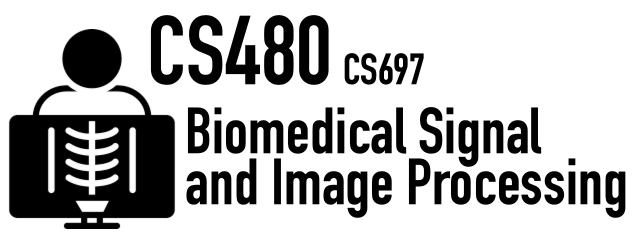
# Assignment 1


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [4]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

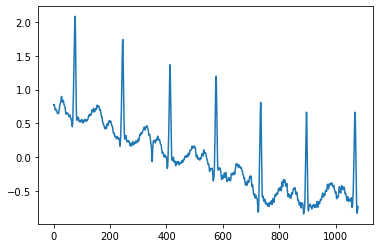

In [5]:
# TODO your plotting code goes here
graph = ecg[8*SAMPLING_RATE:11*SAMPLING_RATE]
plt.plot(graph)
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [6]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [7]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 7.5 MB/s 


In [8]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [9]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


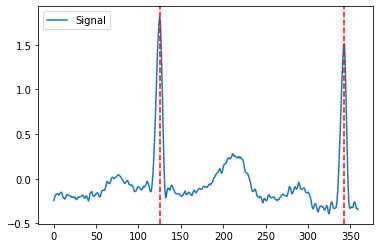

In [10]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[:SAMPLING_RATE])

[245 412 576 734 896]


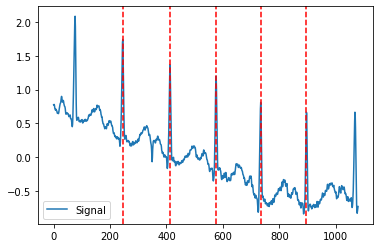

In [11]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
_, rpeaks1 = nk.ecg_peaks(graph, sampling_rate=SAMPLING_RATE)
print(rpeaks1['ECG_R_Peaks'])
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1
plot = nk.events_plot(rpeaks1['ECG_R_Peaks'], graph)

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [23]:
print(len(rpeaks1['ECG_R_Peaks'])*60/(11-9+1))

100.0


I think the patient has more than normal heart rate, which is 72 beats per minute.

**Task 4:** Detect P Q S T Peaks. [25 Points]

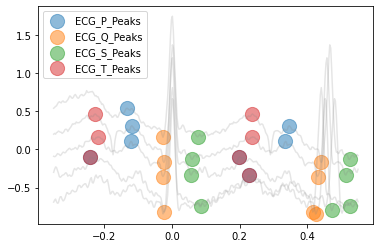

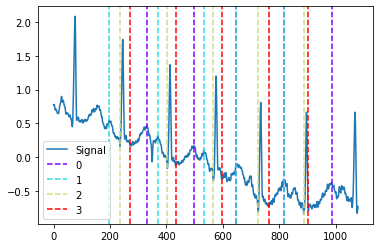

In [24]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(graph, rpeaks1, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], graph)

In [ ]:
# TODO Does the detection work well?

As per the concepts taught in the class, it does look like it worked well.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

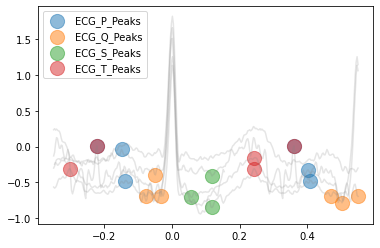

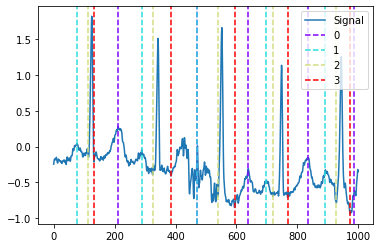

In [52]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

# before filtering
_, rpeaks2 = nk.ecg_peaks(ecg[:1000], sampling_rate=SAMPLING_RATE)
#plot = nk.events_plot(rpeaks2['ECG_R_Peaks'], ecg[:1000])
# _, waves_peak = nk.ecg_delineate(ecg[:1000], rpeaks2, sampling_rate=SAMPLING_RATE, method="peak")
_, waves_peak = nk.ecg_delineate(ecg[:1000], rpeaks2, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg[:1000])

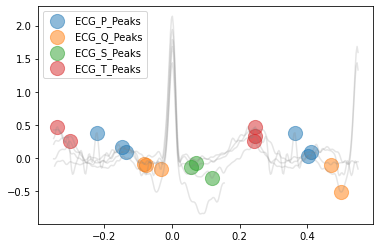

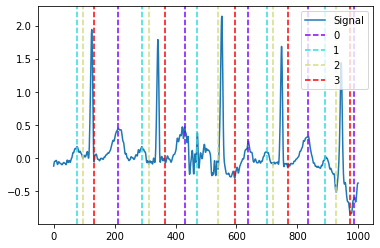

In [80]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
data = nk.signal_filter(ecg[:1000], sampling_rate=SAMPLING_RATE, lowcut=0.25, highcut=60, method='butterworth', order=3)
_, rpeaks3 = nk.ecg_peaks(data, sampling_rate=SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(data, rpeaks3, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], data)

In [ ]:
# TODO Does the filtering improve the result?

Yes, by filtering, we can see a better wave structure, which can allow us to plot and understand the structure well.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#